In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('taxi_trip_pricing.csv')
data.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [3]:
data.shape

(1000, 11)

In [4]:
data.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

<Axes: xlabel='Trip_Price', ylabel='Count'>

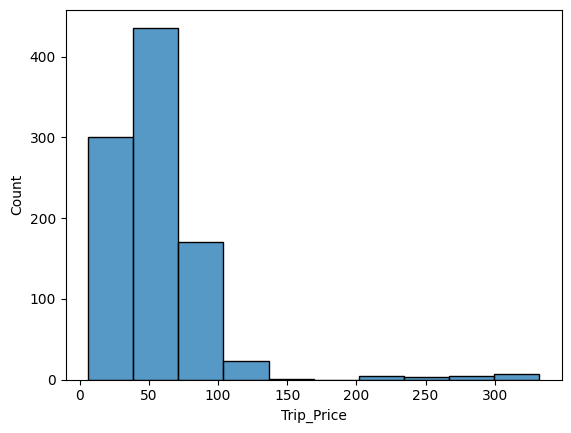

In [5]:
sns.histplot(data=data,x=data.Trip_Price,bins=10)

array([[<Axes: title={'center': 'Trip_Distance_km'}>,
        <Axes: title={'center': 'Passenger_Count'}>,
        <Axes: title={'center': 'Base_Fare'}>],
       [<Axes: title={'center': 'Per_Km_Rate'}>,
        <Axes: title={'center': 'Per_Minute_Rate'}>,
        <Axes: title={'center': 'Trip_Duration_Minutes'}>],
       [<Axes: title={'center': 'Trip_Price'}>, <Axes: >, <Axes: >]],
      dtype=object)

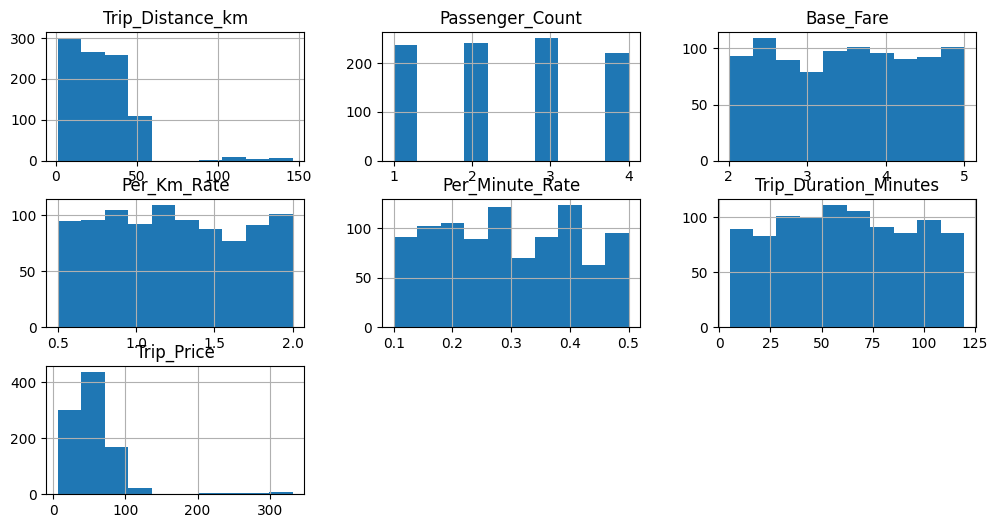

In [6]:
data.hist(bins=10,figsize=(12,6))

In [7]:
data.Weather

0      Clear
1      Clear
2      Clear
3        NaN
4      Clear
       ...  
995    Clear
996    Clear
997     Rain
998    Clear
999    Clear
Name: Weather, Length: 1000, dtype: object

In [8]:
data.dtypes

Trip_Distance_km         float64
Time_of_Day               object
Day_of_Week               object
Passenger_Count          float64
Traffic_Conditions        object
Weather                   object
Base_Fare                float64
Per_Km_Rate              float64
Per_Minute_Rate          float64
Trip_Duration_Minutes    float64
Trip_Price               float64
dtype: object

In [9]:
cols = [col for col in data.select_dtypes(exclude='object')]
corr = data[cols].corr()
print(corr)

                       Trip_Distance_km  Passenger_Count  Base_Fare  \
Trip_Distance_km               1.000000        -0.048397   0.032218   
Passenger_Count               -0.048397         1.000000   0.022932   
Base_Fare                      0.032218         0.022932   1.000000   
Per_Km_Rate                   -0.017041         0.030213   0.003092   
Per_Minute_Rate               -0.025902         0.034068  -0.019150   
Trip_Duration_Minutes         -0.022102         0.022845   0.012035   
Trip_Price                     0.849123        -0.014223   0.035533   

                       Per_Km_Rate  Per_Minute_Rate  Trip_Duration_Minutes  \
Trip_Distance_km         -0.017041        -0.025902              -0.022102   
Passenger_Count           0.030213         0.034068               0.022845   
Base_Fare                 0.003092        -0.019150               0.012035   
Per_Km_Rate               1.000000         0.029241               0.027199   
Per_Minute_Rate           0.029241       

<Axes: >

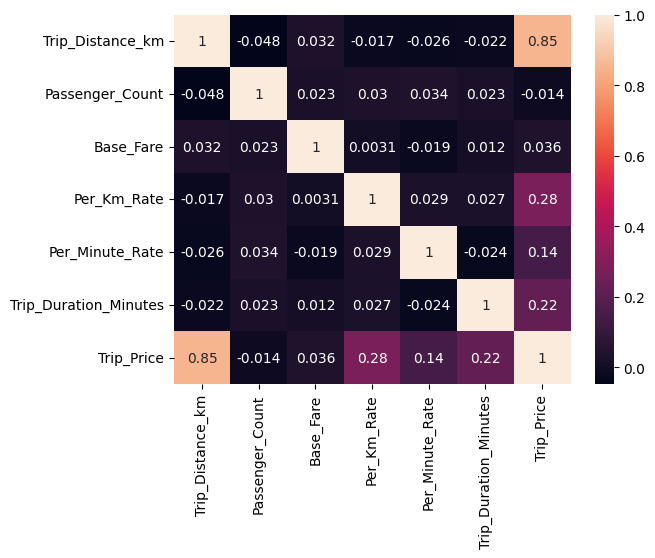

In [10]:
sns.heatmap(corr,annot=True)

In [11]:
data.isnull().sum()/data.shape[0] * 100

Trip_Distance_km         5.0
Time_of_Day              5.0
Day_of_Week              5.0
Passenger_Count          5.0
Traffic_Conditions       5.0
Weather                  5.0
Base_Fare                5.0
Per_Km_Rate              5.0
Per_Minute_Rate          5.0
Trip_Duration_Minutes    5.0
Trip_Price               4.9
dtype: float64

In [12]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
data[cols] = imputer.fit_transform(data[cols])

In [13]:
data.isnull().sum()

Trip_Distance_km          0
Time_of_Day              50
Day_of_Week              50
Passenger_Count           0
Traffic_Conditions       50
Weather                  50
Base_Fare                 0
Per_Km_Rate               0
Per_Minute_Rate           0
Trip_Duration_Minutes     0
Trip_Price                0
dtype: int64

In [14]:
cat_cols = [col for col in data.select_dtypes(exclude='float64')]
data[cat_cols]

,Time_of_Day,Day_of_Week,Traffic_Conditions,Weather
0,Morning,Weekday,Low,Clear
1,Afternoon,Weekday,High,Clear
2,Evening,Weekend,High,Clear
3,Evening,Weekday,Low,NaN
4,Evening,Weekday,High,Clear
...,...,...,...,...
995,Afternoon,Weekend,Medium,Clear
996,Night,Weekday,Medium,Clear
997,Morning,Weekday,Low,Rain
998,Morning,Weekday,Low,Clear


In [15]:
for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

In [16]:
data.isnull().sum()

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

In [17]:
data['total_trip_distance_rate'] = data['Trip_Distance_km'] * data['Per_Km_Rate']
data['total_duration_rate'] = data['Trip_Duration_Minutes'] * data['Per_Minute_Rate']

In [18]:
data.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,total_trip_distance_rate,total_duration_rate
0,19.350000,Morning,Weekday,3.0,Low,Clear,3.560000,0.80,0.32,53.82,36.2624,15.4800,17.2224
1,47.590000,Afternoon,Weekday,1.0,High,Clear,3.573333,0.62,0.43,40.57,44.5984,29.5058,17.4451
2,36.870000,Evening,Weekend,1.0,High,Clear,2.700000,1.21,0.15,37.27,52.9032,44.6127,5.5905
3,30.330000,Evening,Weekday,4.0,Low,Clear,3.480000,0.51,0.15,116.81,36.4698,15.4683,17.5215
4,15.506667,Evening,Weekday,3.0,High,Clear,2.930000,0.63,0.32,22.64,15.6180,9.7692,7.2448


<Axes: >

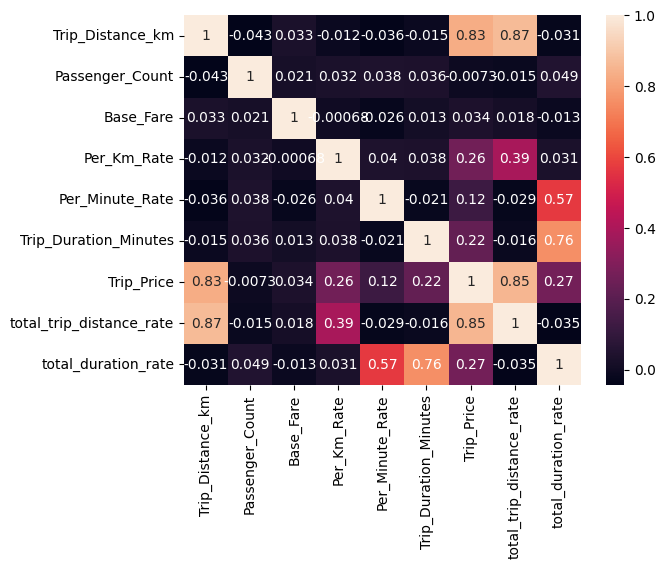

In [19]:
cols = [col for col in data.select_dtypes(exclude='object')]
corr = data[cols].corr()
sns.heatmap(corr,annot=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Trip_Distance_km          1000 non-null   float64
 1   Time_of_Day               1000 non-null   object 
 2   Day_of_Week               1000 non-null   object 
 3   Passenger_Count           1000 non-null   float64
 4   Traffic_Conditions        1000 non-null   object 
 5   Weather                   1000 non-null   object 
 6   Base_Fare                 1000 non-null   float64
 7   Per_Km_Rate               1000 non-null   float64
 8   Per_Minute_Rate           1000 non-null   float64
 9   Trip_Duration_Minutes     1000 non-null   float64
 10  Trip_Price                1000 non-null   float64
 11  total_trip_distance_rate  1000 non-null   float64
 12  total_duration_rate       1000 non-null   float64
dtypes: float64(9), object(4)
memory usage: 101.7+ KB


In [21]:
data.Time_of_Day.unique()

array(['Morning', 'Afternoon', 'Evening', 'Night'], dtype=object)

In [22]:
from sklearn.preprocessing import OrdinalEncoder
imputee = OrdinalEncoder(handle_unknown='error')
data[cat_cols] = imputee.fit_transform(data[cat_cols])

In [23]:
data[cat_cols].head()

,Time_of_Day,Day_of_Week,Traffic_Conditions,Weather
0,2.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0


In [24]:
data.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,total_trip_distance_rate,total_duration_rate
0,19.350000,2.0,0.0,3.0,1.0,0.0,3.560000,0.80,0.32,53.82,36.2624,15.4800,17.2224
1,47.590000,0.0,0.0,1.0,0.0,0.0,3.573333,0.62,0.43,40.57,44.5984,29.5058,17.4451
2,36.870000,1.0,1.0,1.0,0.0,0.0,2.700000,1.21,0.15,37.27,52.9032,44.6127,5.5905
3,30.330000,1.0,0.0,4.0,1.0,0.0,3.480000,0.51,0.15,116.81,36.4698,15.4683,17.5215
4,15.506667,1.0,0.0,3.0,0.0,0.0,2.930000,0.63,0.32,22.64,15.6180,9.7692,7.2448


In [25]:
data = data.drop(['Per_Minute_Rate','Per_Km_Rate','Trip_Distance_km','Trip_Duration_Minutes'],axis=1)

In [26]:
data.head()

,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Trip_Price,total_trip_distance_rate,total_duration_rate
0,2.0,0.0,3.0,1.0,0.0,3.560000,36.2624,15.4800,17.2224
1,0.0,0.0,1.0,0.0,0.0,3.573333,44.5984,29.5058,17.4451
2,1.0,1.0,1.0,0.0,0.0,2.700000,52.9032,44.6127,5.5905
3,1.0,0.0,4.0,1.0,0.0,3.480000,36.4698,15.4683,17.5215
4,1.0,0.0,3.0,0.0,0.0,2.930000,15.6180,9.7692,7.2448


In [27]:
X = data.copy()
y = X.Trip_Price
X.drop('Trip_Price',axis=1,inplace=True)
# X.drop('Traffic_Conditions',axis=1,inplace=True)
X.drop('Time_of_Day',axis=1,inplace=True)
X.drop('Day_of_Week',axis=1,inplace=True)
X.drop('Weather',axis=1,inplace=True)
# print(X)
# print(y)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)

In [29]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=85,max_leaf_nodes=100,random_state=0)

In [30]:
model.fit(x_train,y_train)
pred = model.predict(x_test)
print(pred)

[ 36.13736029  27.73355724  30.84465611  50.40250513  12.13187633
  48.06957304 295.30913216  32.89840878  65.70178261  30.79675411
  53.38187692  81.08392963  45.45032906  32.42308398  62.41644147
  89.21209949  67.7319553   35.16887415  30.03753681  24.41264954
  23.38577104 259.51161879  48.72166418  14.08127337  35.02639855
  55.13597945  30.09413421  56.14618519  21.97209372  47.50490072
  49.32199089  64.53690464  71.85469968  49.65760474  96.83392161
  36.79531667  34.43042157  52.25864173  56.0489503  106.99922744
  58.39742473  54.35028376  48.77270443  44.43909734  40.99398149
  36.36906356  64.01088279 295.22639483  35.68655071  54.96928836
  45.31454116  35.68756524  36.43459315  47.0726234   46.32256074
  37.84757393  75.85124952  40.91469398  52.76390222  38.50586587
  22.50098943  38.06496948  32.08713726  30.88441058  35.83048462
  60.37656045  89.76972302  78.39402958  57.45177614  46.45152198
  58.13589655  23.26484803  61.78436109  60.85546346  25.72460303
  74.02751

In [31]:
print(y_test)

993     55.3348
859     25.0950
298     29.0925
553     53.8901
672      9.9494
         ...   
679     58.0149
722     14.8186
215     66.1016
653    101.0292
150     36.4958
Name: Trip_Price, Length: 200, dtype: float64


In [32]:
round(model.score(x_test,y_test),2)

0.91

In [33]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(pred,y_test)
print(mae)

6.044405650341348


In [34]:
import math
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,pred)
rmse = math.sqrt(mse)
print(mse)
print(rmse)

157.13698601399014
12.535429231342265


<Axes: >

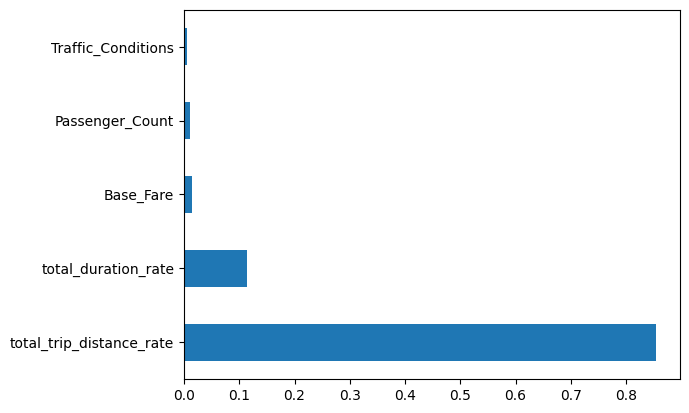

In [35]:
feature_imp = pd.Series(model.feature_importances_,index = x_train.columns)
feature_imp.nlargest(6).plot(kind='barh')